# Reinforcement Learning

# Markov Decision Process

This notebook presents some examples of Markov Decison Processes, where an **agent** interacts with its **environment** and collects **rewards**.

In [1]:
import numpy as np
from copy import deepcopy

In [2]:
from model import Walk, Maze, TicTacToe, Nim, ConnectFour
from agent import Agent

## Walk

We start with a walk in a square. Some states have positive rewards.

In [3]:
# environment
walk = Walk()

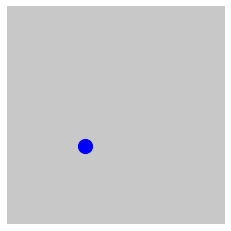

In [4]:
walk.display()

In [5]:
walk.Size

(7, 7)

In [6]:
# rewards (to be discovered)
walk.Rewards

{(1, 1): 1, (1, 5): 2, (5, 5): 3, (5, 1): 4}

In [7]:
state = walk.state

In [8]:
state

array([4, 2])

In [9]:
walk.get_actions(state)

[(0, 1), (0, -1), (1, 0), (-1, 0)]

In [10]:
action = (0, 1)

In [11]:
walk.step(action)

(0, False)

In [12]:
# agent with random policy
agent = Agent(walk)

In [13]:
state = walk.state
action = agent.get_action(state)

In [14]:
state

array([4, 3])

In [15]:
action

(0, -1)

In [16]:
reward, stop = walk.step(action)

In [17]:
reward

0

In [18]:
stop

False

In [19]:
walk.state

array([4, 2])

In [20]:
stop, states, rewards = agent.get_episode(20)

In [21]:
# initial state + 20 moves
len(states)

21

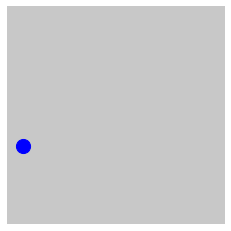

In [22]:
animation = walk.display(states)

In [23]:
animation

In [24]:
len(rewards)

21

In [25]:
np.sum(rewards)

2

## Maze

Now let's try to escape a maze!

In [26]:
maze_map = np.load('maze.npy')

In [27]:
maze = Maze()
init_state = (1, 0)
exit_state = (1, 20)
maze.set_parameters(maze_map, init_state, [exit_state])
maze = Maze()

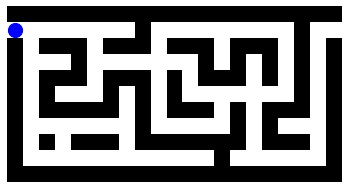

In [28]:
maze.display()

In [29]:
maze.state

array([1, 0])

In [30]:
state = maze.state
reward = maze.get_reward(state)

In [31]:
reward

-1

In [32]:
maze.get_actions(state)

[(0, 1)]

In [33]:
action = (0, 1)

In [34]:
maze.step(action)

(-1, False)

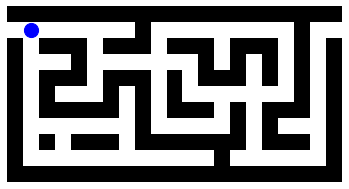

In [35]:
maze.display()

In [36]:
# agent with random policy
agent = Agent(maze)

In [37]:
stop, states, rewards = agent.get_episode()

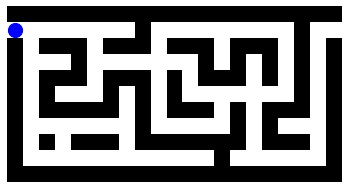

In [38]:
animation = maze.display(states)

In [39]:
animation

In [40]:
# time in the Maze
-np.sum(rewards)

100

## Games

Finally, let's play games!<br>
Note that in most games:
* you play against an adversary (which is part of the environment),
* you may play first or second,
* when your adversary plays, you have only one possible action (let your adversary play :-).

We here consider [Tic-Tac-Toe](https://en.wikipedia.org/wiki/Tic-tac-toe), [Nim](https://en.wikipedia.org/wiki/Nim) and [Connect Four](https://en.wikipedia.org/wiki/Connect_Four).
Feel free to add more :-)

## Tic-Tac-Toe

In [41]:
Game = TicTacToe

In [42]:
game = Game()

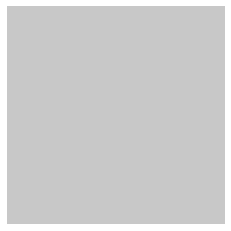

In [43]:
game.display()

In [44]:
# player, board
game.state

[1,
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])]

In [45]:
# random player
agent = Agent(game)

In [46]:
action = agent.get_action(game.state)

In [47]:
action

(1, 2)

In [48]:
reward, stop = game.step(action)

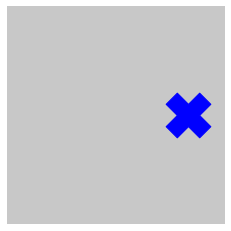

In [49]:
game.display()

In [50]:
action = agent.get_action(game.state)

In [51]:
# no action to be selected!
print(action)

None


In [52]:
reward, stop = game.step(action)

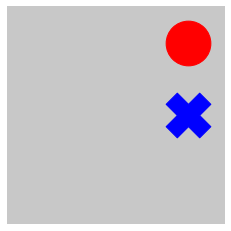

In [53]:
game.display()

In [54]:
stop, states, rewards = agent.get_episode()

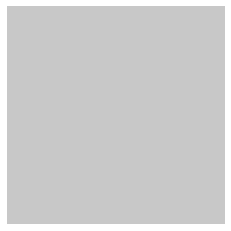

In [55]:
animation = game.display(states)

In [56]:
# you're blue
animation

In [57]:
rewards

[0, 0, 0, 0, 0, 0, 0, 1]

In [58]:
# get statistics (wins, ties, defeats)
agent.get_game_stats()

[54, 12, 34]

In [59]:
# your adversary starts
game = Game(play_first=False)

In [60]:
# you still play at random
agent = Agent(game)

In [61]:
stop, states, rewards = agent.get_episode()

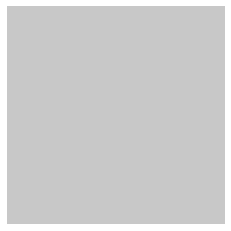

In [62]:
animation = game.display(states)

In [63]:
# now red starts
animation

In [64]:
rewards

[0, 0, 0, 0, 0, -1]

In [65]:
# wins, ties, defeats
agent.get_game_stats()

[32, 18, 50]

In [66]:
# a better policy: look one step ahead
def one_step_policy(state):
    game = Game()
    player, board = state
    actions = game.get_all_actions(state)
    # win move
    for action in actions:
        probs, states, rewards = game.get_model(state, action)
        if player in rewards:
            return [1], [action]
    # move to avoid defeat
    for action in actions:
        state = -player, board
        probs, states, rewards = game.get_model(state, action)
        if -player in rewards:
            return [1], [action]
    # random move
    if len(actions):
        probs = np.ones(len(actions)) / len(actions)
        return probs, actions
    return [1], [None]

In [67]:
# look one-step ahead
agent = Agent(game, one_step_policy)

In [68]:
stop, states, rewards = agent.get_episode()

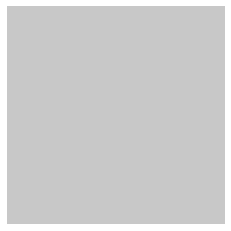

In [69]:
animation = game.display(states)

In [70]:
animation

In [71]:
agent.get_game_stats()

[77, 19, 4]

In [72]:
# your adversary also looks one-step ahead
game = Game(adversary_policy=one_step_policy)

In [73]:
agent = Agent(game, one_step_policy)

In [74]:
stop, states, rewards = agent.get_episode()

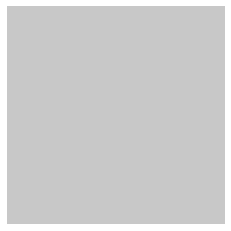

In [75]:
animation = game.display(states)

In [76]:
animation

In [77]:
agent.get_game_stats()

[29, 58, 13]

## Nim

In [78]:
Game = Nim

In [79]:
game = Game()

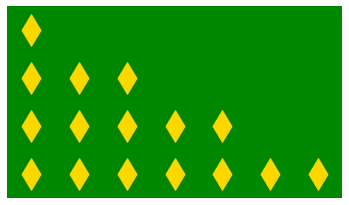

In [80]:
game.display()

In [81]:
# player, board
game.state

[1, array([1, 3, 5, 7])]

In [82]:
# random player
agent = Agent(game)

In [83]:
state = game.state
action = agent.get_action(state)

In [84]:
action

(3, 5)

In [85]:
reward, stop = game.step(action)

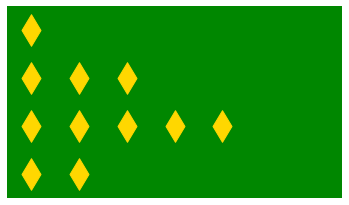

In [86]:
game.display()

In [87]:
stop, states, rewards = agent.get_episode()

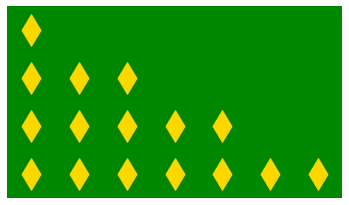

In [88]:
animation = game.display(states)

In [89]:
animation

In [90]:
rewards

[0, 0, 0, 0, 0, -1]

In [91]:
agent.get_game_stats()

[43, 0, 57]

## To do 

Play and try to win!

In [92]:
game = Game()

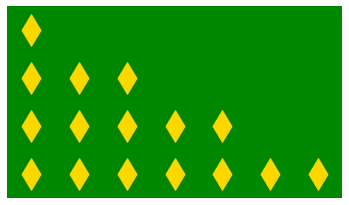

In [93]:
game.display()

In [94]:
# your turn
action = (2, 3)
reward, stop = game.step(action)

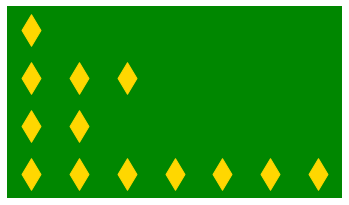

In [95]:
game.display()

In [96]:
game.state

(-1, array([1, 3, 2, 7]))

In [105]:
# adversary
reward, stop = game.step()

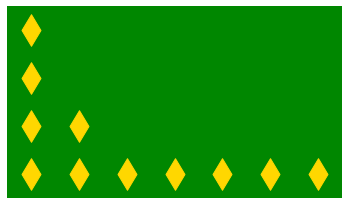

In [106]:
game.display()

## Connect Four

In [116]:
Game = ConnectFour

In [117]:
game = Game()

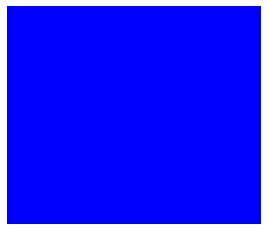

In [118]:
game.display()

In [119]:
# random player
agent = Agent(game)

In [120]:
stop, states, rewards = agent.get_episode()

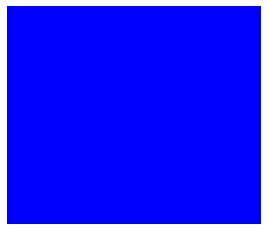

In [121]:
animation = game.display(states)

In [122]:
# you play yellow
animation

In [123]:
agent.get_game_stats()

[53, 1, 46]

In [124]:
agent = Agent(game, one_step_policy)

In [125]:
stop, states, rewards = agent.get_episode()

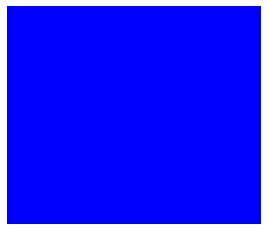

In [126]:
animation = game.display(states)

In [127]:
animation

In [128]:
agent.get_game_stats()

[97, 0, 3]